# Multi - layer Perceptron

- Gần giống như Soft max, chỉ là thêm vài lớp Hiden-layer để xử lý dữ liệu cho dễ sử dụng hơn ...
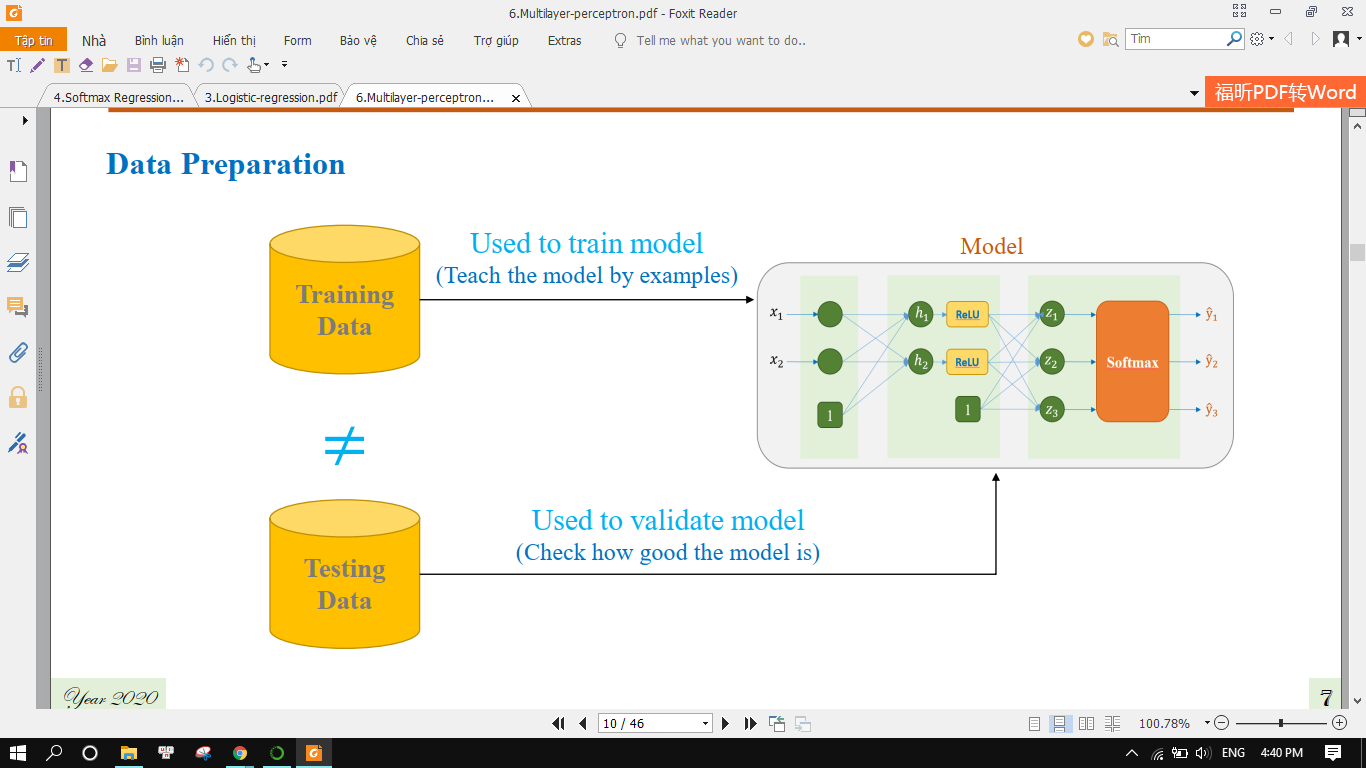

## CODE

[[-1.34022653 -1.3154443 ]
 [-1.34022653 -1.3154443 ]
 [-1.39706395 -1.3154443 ]
 [-1.2833891  -1.3154443 ]
 [-1.34022653 -1.3154443 ]]
--------------------
(150,)


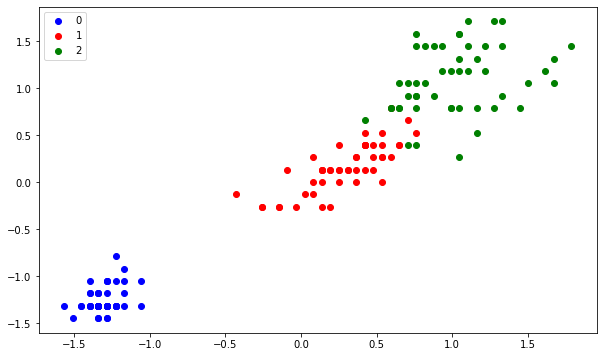

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy.core.defchararray as np_f

X = np.genfromtxt('data/iris.csv', dtype = float, delimiter = ',',usecols = [2,3], skip_header = 1)
Y = np.genfromtxt('data/iris.csv', dtype = str, delimiter = ',',usecols = [4], skip_header = 1)
# CHuẩn hoá X
X = preprocessing.scale(X)
print(X[:5])
print('--'*10)

#Chuẩn hoá Y
categories = np.unique(Y)
for i in range(categories.size):
    Y = np_f.replace(Y,categories[i], str(i))
Y = Y.astype(float)
print(Y.shape)

# Đã chuẩn hoá
plt.figure(figsize = (10,6))
plt.scatter(X[Y == 0][:,0], X[Y==0][:,1], color = 'b', label = '0' )
plt.scatter(X[Y == 1][:,0], X[Y == 1][:,1], color = 'r', label = '1')
plt.scatter(X[Y == 2][:,0], X[Y == 2][:,1], color = 'g', label = '2')
plt.legend()

# #Đã chuẩn hoá 
# plt.figure(figsize = (10,6))
# plt.scatter(X1[Y == 0][:,0], X1[Y==0][:,1], color = 'b', label = '0' )
# plt.scatter(X1[Y == 1][:,0], X1[Y == 1][:,1], color = 'r', label = '1')
# plt.scatter(X1[Y == 2][:,0], X1[Y == 2][:,1], color = 'g', label = '2')
# plt.legend()
plt.show()

In [137]:
y=Y.astype(int)
N = 50 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
# initialize parameters randomly
h = 50 # size of hidden layer
W = 0.01 * np.random.randn(D,h) #(2,50)
b = np.zeros((1,h)) #(1,50)
W2 = 0.01 * np.random.randn(h,K) #(50,3)
b2 = np.zeros((1,K)) #(1,3)
# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.9
losses = []
for i in range(20000):  
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # ReLU activation #(150,50)
    scores = np.dot(hidden_layer, W2) + b2  # (150,50)x(50,3) + (1,3) = (150,3)
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] (150,3)
    if i == 19999:
        print('probs: ', probs.shape)
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y]) #(150,)
    loss = np.sum(corect_logprobs)/num_examples
    if i % 100 == 0:
        losses.append(loss)
    # compute the gradient on scores
    dscores = probs #(150,3)
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores) # (50,3)
    db2 = np.sum(dscores, axis=0, keepdims=True) 
    
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T) #(150,50)
    
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0 # Tính chất hàm ReLU >= 0 và luôn tăng hoặc không đổi-> nên đạo hàm luôn >= 0
    
    # finally into W,b
    dW = np.dot(X.T, dhidden) #(2,50)
    db = np.sum(dhidden, axis=0, keepdims=True)    
    # perform a parameter update
    W += -learning_rate * dW
    b += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2

probs:  (150, 3)


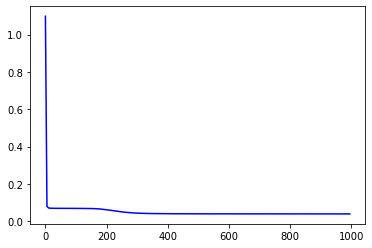

loss đầu:  [1.0983934601339322, 0.08008806067009888] loss cuối:  0.03899085437153779


In [138]:
x_axis = range(len(losses))
x_axis = np.array(x_axis)*5
plt.plot(x_axis, losses, color = 'b')
plt.show()
print('loss đầu: ',losses[:2],'loss cuối: ',losses[-1] )

In [139]:
hiden_layer = np.maximum(0, np.dot(X,W) + b)
scores = np.dot(hiden_layer, W2) + b2
predict_class = np.argmax(scores, axis = 1)
print('Training accuracy: %.2f' %(np.mean(predict_class == y)))

Training accuracy: 0.99


(-2.4470764792980413, 2.692923520701963)

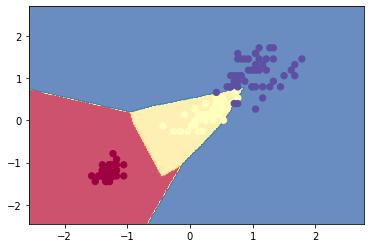

In [15]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## TỰ CODE

TỰ CODE
[[-1.34022653 -1.3154443 ]
 [-1.34022653 -1.3154443 ]
 [-1.39706395 -1.3154443 ]
 [-1.2833891  -1.3154443 ]
 [-1.34022653 -1.3154443 ]]
--------------------
(150,)


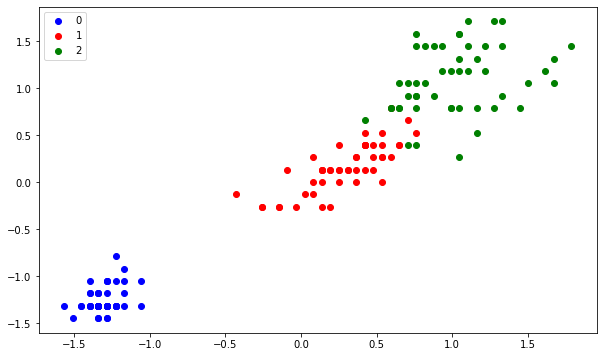

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy.core.defchararray as np_f
print('TỰ CODE')
X = np.genfromtxt('data/iris.csv', dtype = float, delimiter = ',',usecols = [2,3], skip_header = 1)
Y = np.genfromtxt('data/iris.csv', dtype = str, delimiter = ',',usecols = [4], skip_header = 1)
# CHuẩn hoá X
X = preprocessing.scale(X)
print(X[:5])
print('--'*10)

#Chuẩn hoá Y
categories = np.unique(Y)
for i in range(categories.size):
    Y = np_f.replace(Y,categories[i], str(i))
Y = Y.astype(float)
print(Y.shape)

# Đã chuẩn hoá
plt.figure(figsize = (10,6))
plt.scatter(X[Y == 0][:,0], X[Y==0][:,1], color = 'b', label = '0' )
plt.scatter(X[Y == 1][:,0], X[Y == 1][:,1], color = 'r', label = '1')
plt.scatter(X[Y == 2][:,0], X[Y == 2][:,1], color = 'g', label = '2')
plt.legend()

# #Đã chuẩn hoá 
# plt.figure(figsize = (10,6))
# plt.scatter(X1[Y == 0][:,0], X1[Y==0][:,1], color = 'b', label = '0' )
# plt.scatter(X1[Y == 1][:,0], X1[Y == 1][:,1], color = 'r', label = '1')
# plt.scatter(X1[Y == 2][:,0], X1[Y == 2][:,1], color = 'g', label = '2')
# plt.legend()
plt.show()

In [141]:
N = 50 #number of points per class
D = 2 # 2 feature + 1 bias 
K = 3 # 3 class

h = 50 # size of hiden layer 
W1 = 0.01*np.random.randn(D, h) # W1(2,50)
W1 = np.append(np.zeros((1,h)), W1,axis = 0) #W1(3,50)
W2 = 0.01*np.random.randn(h, K) # W2(50,3) 
num_example = X.shape[0]
lr = 0.9
losses = []
X_b = np.c_[np.ones((X.shape[0],1)), X] # X_b(150,3)
Y = Y.astype(int)
for i in range(20000):
    hidden = np.maximum(0, np.dot(X_b, W1)) #ReLu activation (150,51)
   #hidden_b = np.c_[np.ones((num_example,1)),hidden.T] #(150,51)
   #hidden_b = hidden_b.T #(51,150)
    scores = np.dot(hidden, W2) # (150,3)
    
    exp_scores = np.exp(scores)
    probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims = True)
    
    corect_logprobs = -np.log(probs[range(probs.shape[0]), Y])
    loss = np.sum(corect_logprobs)/num_example
    if i%100 ==0:
        losses.append(loss)
    
    # Tính đạo hàm của Loss theo scores
    dscores = probs 
    dscores[range(num_example), Y] -= 1
    dscores /= num_example # (150,3)
    
    # TÍnh đạo hàm của Loss theo
    dW2 = np.dot(hidden.T, dscores) #(51,3)
   
    dhidden = np.dot(dscores, W2.T) # (150,51)
    dhidden[hidden <=0] =0 # chuẩn hoá vì hàm ReLU không âm
    
    dW1= np.dot(X_b.T, dhidden) # (3,51)
    
    W1 += -lr*dW1
    W2 += -lr*dW2

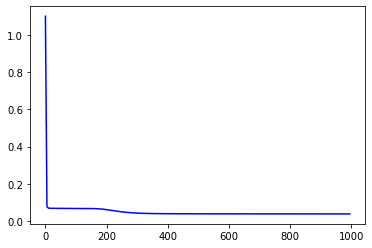

loss đầu:  [1.0990085769893096, 0.07684462149741589] loss cuối:  0.038991775808655676


In [142]:
x_axis = range(len(losses))
x_axis = np.array(x_axis)*5
plt.plot(x_axis, losses, color = 'b')
plt.show()
print('loss đầu: ',losses[:2],'loss cuối: ',losses[-1] )

In [143]:
hiden_layer = np.maximum(0, np.dot(X_b,W1))
scores = np.dot(hidden, W2)
predict_class = np.argmax(scores, axis = 1)
print('Training accuracy: %.2f' %(np.mean(predict_class == y)))

Training accuracy: 0.99


In [126]:
a1 = np.array([1,2,3,4,5,6]).reshape(2,3)
a2 = np.array([2,4,6]).reshape(1,3)
print(a1.shape, a2.shape)
print(a1)
a1 = np.append(a1,a2, axis = 0)
a1 = np.append(np.zeros((1,3)),a1,axis = 0)
print(a1)

(2, 3) (1, 3)
[[1 2 3]
 [4 5 6]]
[[0. 0. 0.]
 [1. 2. 3.]
 [4. 5. 6.]
 [2. 4. 6.]]
